## Libraries

In [1]:
import tempfile
import math
import os
from subprocess import call
import matplotlib.pyplot as plt
from f90nml import *
from array import *
import numpy as np
import pandas as pd 
import seaborn as sns
from statistics import *
import shutil
import sys
from matplotlib.ticker import FormatStrFormatter

#read in printFolder, makeDefNameList, newFolder, deleteFolder, readOutput from coreFunctions.py
from coreFunctions import *

#read in plotting functionality from plottingFunctions.py
from plottingFunctions import *

call("rm -rf tmp*",shell=True)

dfModel = []#will contain output from our model

## Enter Custom Inputs, then Run the Model

In [2]:
nameList = makeDefNamelist() #make namelist
nameList['ebm']['lverbose']=True #controls terminal output, used for debugging
nameList['ebm']['rBirth']=.0252;
nameList['ebm']['rDeath']=.0142857;
nameList['ebm']['rco2']=2.00e-4;
nameList['ebm']['coupled']=True;

#change runtime
runTime=1000
nameList['ebm']['runTime'] = runTime#change runtime

#change distance
newA = .93#AU
nameList['ebm']['relsolcon']=newA**-2 #inverse square law for solar flux


#change pco2
#newPco2=284
newPco2=284*.1
nameList['ebm']['pco20']=newPco2/10**6

#run the program
dfModel, finalavgtemp, eqTime, eqTemp, equilibrium = runProgram("driver.exe",nameList)

life = (equilibrium) and (eqTemp<=373.15) and (eqTemp>=273.15)
print(life)

Equilibrium Reached at Temp=337.163. At time=96.0
Final Temp(K): 441.23
Final Temp(F): 334.54

True


## Model Analysis

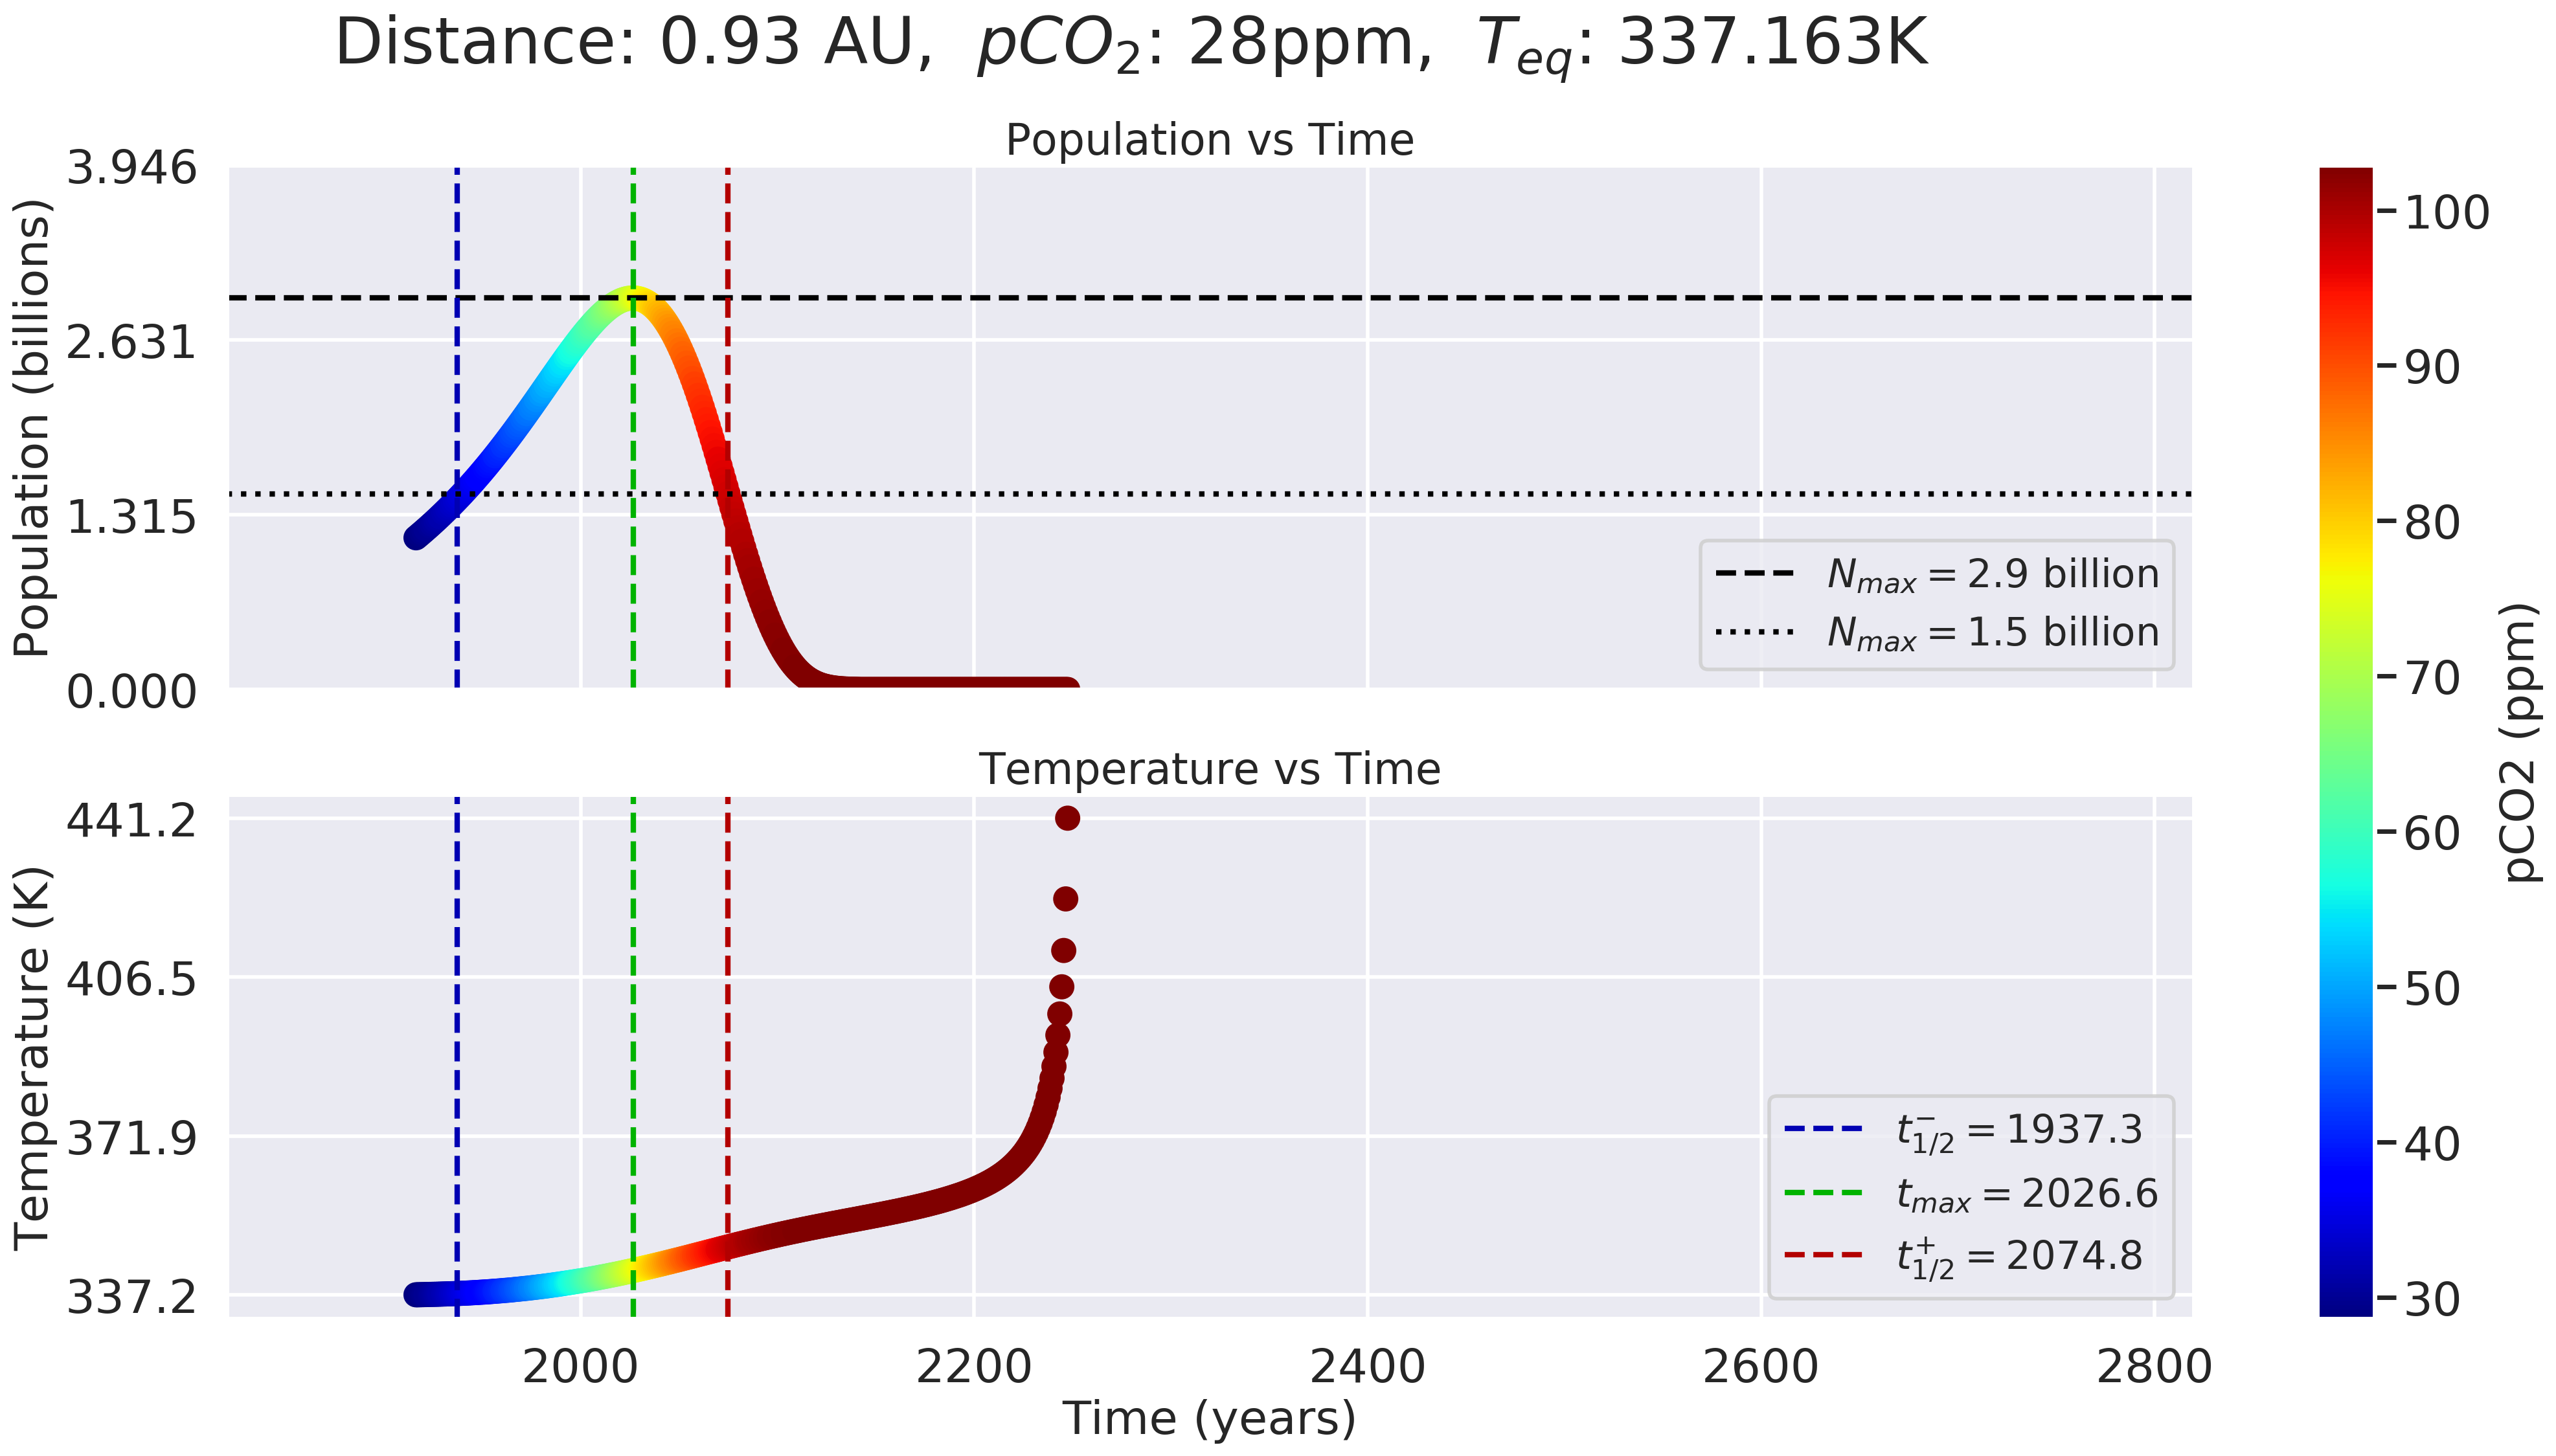

In [3]:
popStats = analyzeRun(dfModel,nameList,False)#get population statistics
popStats['maxPopPlot']=popStats['maxPop']+1;#y range
inputs=[newA,newPco2,runTime]
#-----------------------------------PLOTS----------------------------------------------------------
if equilibrium: plotModelOutput(dfModel,inputs,eqTime,eqTemp,popStats)#plot the output of our model, colored by pco2 
#dfTemp = pd.read_csv('anomaly.csv');#data from NASA GISS: https://data.giss.nasa.gov/gistemp/graphs_v4/
#dfPopCo2 = pd.read_csv('world_stats.csv');#data from Frank, Adam, and Woodruff Sullivan.
#plotModelInput(nameList)#plot the temperature dependence on the growth rate
#plotTruePopCo2(dfPopCo2) #plot true population values vs pco2
#compareModelOutput(dfModel,dfTemp,dfPopCo2)#compare the models output to true data

In [4]:
dfModel

,time,temp,pco2,pop,time_yrs,pco2_ppm
0,3.037100e+09,337.16,0.000029,1141.3,96.239891,28.626
1,3.068700e+09,337.17,0.000029,1153.8,97.241235,28.854
2,3.100400e+09,337.18,0.000029,1166.4,98.245747,29.085
3,3.132100e+09,337.19,0.000029,1179.1,99.250260,29.318
4,3.163700e+09,337.20,0.000030,1192.0,100.251603,29.554
5,3.195400e+09,337.21,0.000030,1205.0,101.256116,29.792
6,3.227100e+09,337.23,0.000030,1218.1,102.260628,30.033
7,3.258800e+09,337.24,0.000030,1231.4,103.265141,30.277
8,3.290400e+09,337.25,0.000031,1244.9,104.266484,30.523
9,3.322100e+09,337.26,0.000031,1258.4,105.270997,30.772
